# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [22]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [23]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [24]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [39]:
# Define Panel Visualization Functions

     
   

     
housing_units = (sfo_data.groupby("year")["housing_units"].mean())

def housing_units_per_year():
    figure_house_units = plt.figure()
    plot_house_units = housing_units.plot.bar()
    plot_house_units.set_xlabel("Year")
    plot_house_units.set_ylabel("House Units")
    plot_house_units.set_title("AVG HOUSING UNITS", fontsize=14, fontweight="bold")
    plt.close(figure_house_units)
    return pn.pane.Matplotlib(figure_house_units)
    
avg_rent = sfo_data.groupby("year")["gross_rent"].mean()
    
def average_gross_rent():
    figure_avg_rent= plt.figure()
    plot_avg_rent= avg_rent.plot()
    plot_avg_rent.set_xlabel("Year")
    plot_avg_rent.set_ylabel("Gross Rent")
    plot_avg_rent.set_title("AVG RENT", fontsize=14, fontweight="bold")
    plt.close(figure_avg_rent)
    return pn.pane.Matplotlib(figure_avg_rent)


average_sales_prices = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()
def average_sales_price():
    figure_average_sales_prices = plt.figure()
    plot_average_sales_prices= average_sales_prices.plot()
    plot_average_sales_prices.set_xlabel('Year')
    plot_average_sales_prices.set_ylabel('$')
    plot_average_sales_prices.set_title('AVG SALES PRICE', fontsize=14, fontweight='bold')
    plt.close(figure_average_sales_prices)
    return pn.pane.Matplotlib(figure_average_sales_prices)

df_total_costs = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
df_total_costs.reset_index(inplace = True)
def average_price_by_neighborhood():
    average_price = df_total_costs.hvplot.line("year", 'sale_price_sqr_foot', xlabel="Year",ylabel="Avg_Price", groupby='neighborhood')
    return   average_price



avg_value = sfo_data.groupby([sfo_data["neighborhood"]]).mean()
most_expensive = avg_value.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
most_expensive = most_expensive.reset_index()
def most_expensive_neighborhood():
    m_e_n = most_expensive.iloc[0:10].hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", title="SanFran Top 10", height=500, rot=45)
    return m_e_n

top_10 = most_expensive.iloc[0:10]
def parallel_coordinates():
    parallel = px.parallel_coordinates(top_10, color = "sale_price_sqr_foot")
    return  parallel

def parallel_categories():
    categories = px.parallel_categories(
    top_10,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    )
    return   categories

df_neighborhood_values = df_total_costs

SF_neighborhods_df = pd.concat([df_total_costs,df_neighborhood_locations, ], axis = "columns", join = "inner")
px.set_mapbox_access_token(mapbox_token)
data_to_plot =  SF_neighborhods_df[["Neighborhood", "Lat", "Lon", "sale_price_sqr_foot", "housing_units", "gross_rent"]]
def neighborhood_map():
    map1 = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon= "Lon", 
    size= "sale_price_sqr_foot", 
    color="Neighborhood",
    zoom=9
    )
    return map1

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [40]:
title = pn.pane.Markdown("sfo House Analisis", width = 100000)

tabs = pn.Tabs(
    ("House Units", housing_units_per_year()),
    ("Gross Rent", average_gross_rent()),
    ("Avg Price", average_sales_price()),
    ("Avg Price by Neiborhood", average_price_by_neighborhood()),
    ("Most Expensive Neiborhood", most_expensive_neighborhood()),
    ("Parallel Coordinates", parallel_coordinates()),
    ("Parallel Categories", parallel_categories()),
    ("Neighborhood Map", neighborhood_map())
    
)
    
     
     
     


dashboard = pn.Column(pn.Row(title),(tabs), width = 1000)

## Serve the Panel Dashboard

Column(width=1000)
    [0] Row
        [0] Markdown(str, width=100000)
    [1] Tabs
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Row(name='Avg Price by Neiborhood')
            [0] HoloViews(DynamicMap, name='Avg Price by Neiborhood')
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [4] HoloViews(Bars, name='Most Expensive N...)
        [5] Plotly(Figure, name='Parallel Coordinates')
        [6] Plotly(Figure, name='Parallel Categories')
        [7] Plotly(Figure, name='Neighborhood Map')
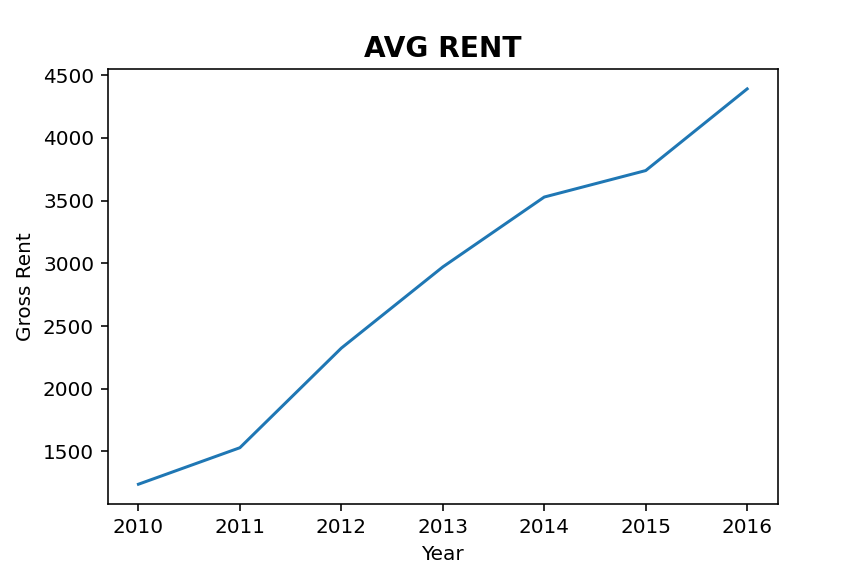
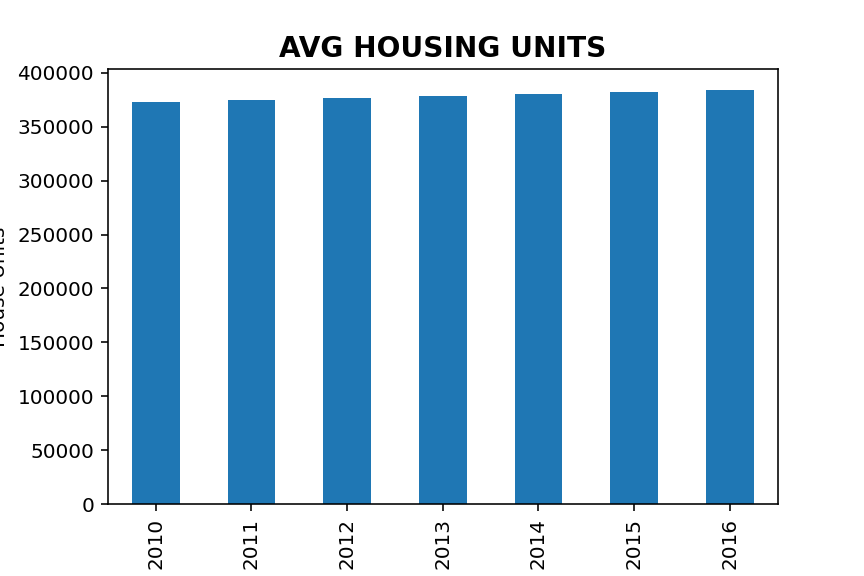
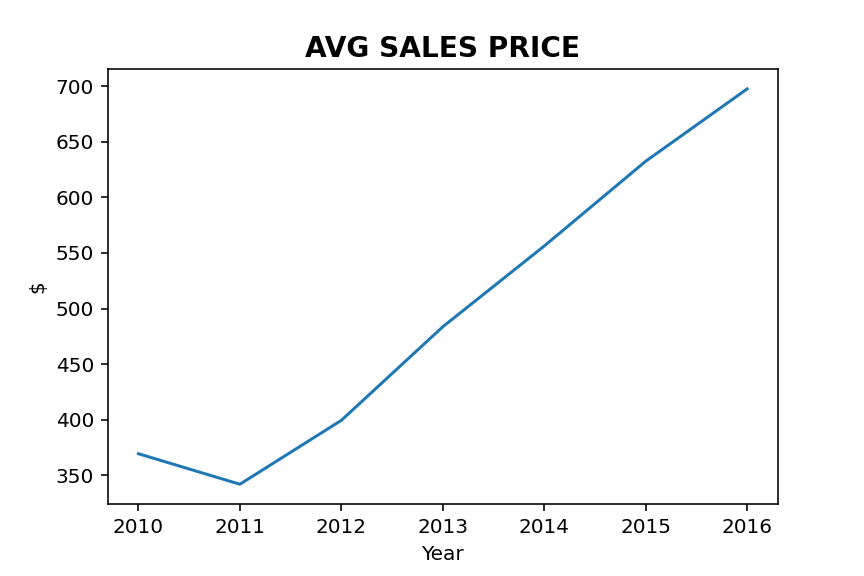

In [41]:
dashboard.servable()